In [1]:
import scipy
from scipy import spatial as sp

In [2]:
import plotly.figure_factory as ff

In [218]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture

import sklearn.metrics as met

%matplotlib inline
import plotly.figure_factory as ff

In [14]:
import matplotlib.cm as cm

In [102]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykrgykm'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [197]:
#helper function to display data after DBScan Clustering
def display_DBScan(labels,db,X,eps,min_samples):
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
        title="eps="+str(eps) + " n_samples=" + str(min_samples) + " Est.no.of clusters= "+ str(n_clusters_)
        plt.title(title)
    #plt.show()

In [97]:
#function to perform K-Means Clustering and save silhouette scores and distortions 
def KMeansClustering(data,K):
    n = range(2,K+1)
    distortions=[]
    silScore=[]
    clustersArray=[]
    for i in n:
        km = KMeans(n_clusters=i)
        km=km.fit(data)
        distortions.append(sum(np.min(sp.distance.cdist(data,
            km.cluster_centers_, 'euclidean'),axis=1)) /
            data.shape[0])
        labels = km.labels_
        silScore.append(silhouette_score(data, labels, metric = 'euclidean'))
        clustersArray.append(km)
        plt.subplot(2,5, i-1)
        display_cluster(data,km,i)
        title='K='+str(i)
        plt.title(title)
    return distortions,silScore,clustersArray

In [6]:
def aggloClustering(data,affinity,linkage):
    agglo = AgglomerativeClustering(n_clusters=5, affinity=affinity, linkage=linkage)
    agglo=agglo.fit(data)
    dendrogram=sch.dendrogram(sch.linkage(data, method='average'))
    plt.figure()

In [217]:
def DBSCAN_Clustering(data,eps_start,eps_stop,eps_step,nsamples_start,nsamples_stop,nsamples_step):
    epsilon=[]
    samples=[]
    silScores=[]
    runs=0;
    epsList=np.arange(eps_start,eps_stop,eps_step)
    for i in range(len(epsList)):
        for nsamples in range (nsamples_start,nsamples_stop,nsamples_step):
            runs=runs+1
            epsilon.append(epsList[i])
            samples.append(nsamples)
            db = DBSCAN(eps=epsList[i], min_samples=nsamples)
            db.fit(data)
            silScores.append(metrics.silhouette_score(data, labels, metric = 'euclidean'))
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            plt.subplot(2,5,runs)
            display_DBScan(labels,db,data,epsList[i],nsamples)
           
            #plt.show()
    return epsilon,samples,silScores

In [251]:
def DBSCAN_Clustering2(data,eps,nsamples):
    silScores=[]
    db = DBSCAN(eps=eps, min_samples=nsamples)
    db.fit(data)
    labels = db.labels_
    silScores.append(met.silhouette_score(data, labels, metric = 'euclidean'))
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    display_DBScan(labels,db,data,eps,nsamples)
    return silScores

In [285]:
data=Multi_blob_Data
silScore_DBSCAN=[]

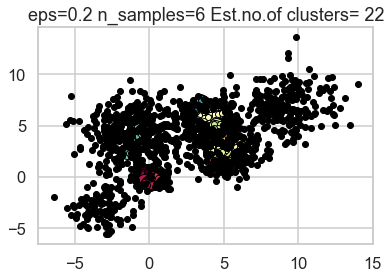

In [287]:
silScore_DBSCAN.append(DBSCAN_Clustering2(data,0.2,6))

# Multi-blob Dataset

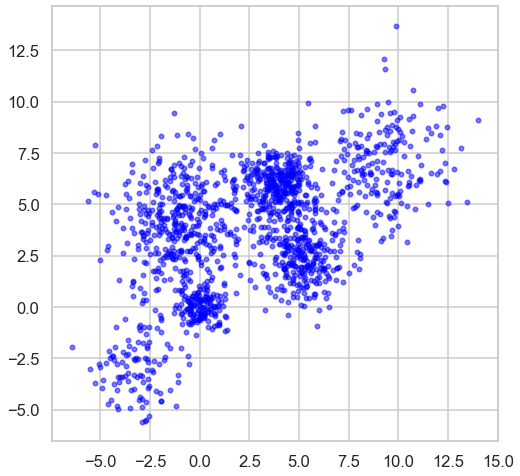

In [8]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

K-Means

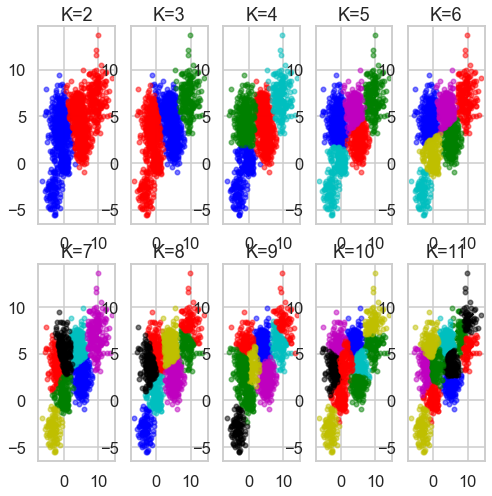

In [128]:
K=11
n = range(2,K+1)
dist_blob,silScore_blob,blob_clustersArray=KMeansClustering(Multi_blob_Data,K)

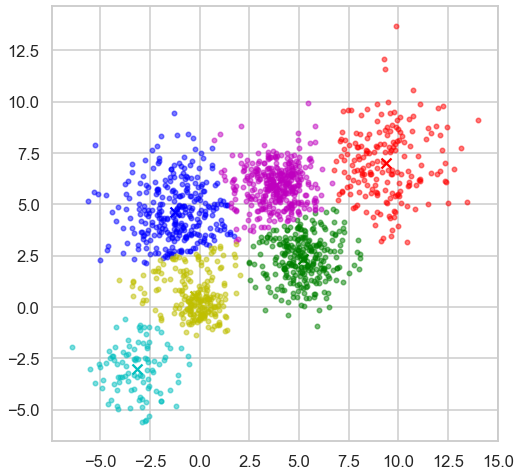

In [130]:
K=6
display_cluster(Multi_blob_Data,blob_clustersArray[K-2],K)#to view an individual clustering run

Distortion function vs K to find optimum no. of clusters

The graph below does not show a clear "elbow" for which the optimum k can be chosen.
To get more conclusive results on the best no. of clusters to be used we seek to plot the sillouete scores vs k

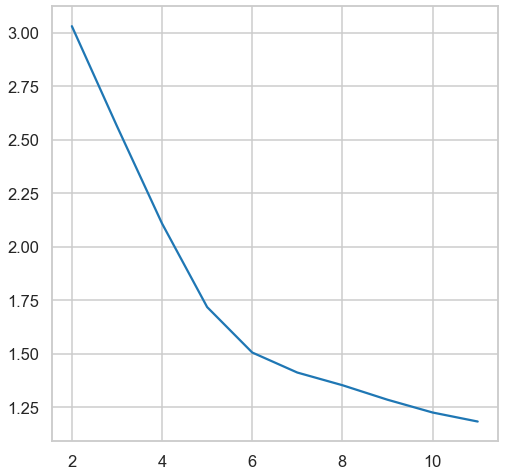

In [121]:
plt.plot(n,dist_blob)

Silhouette score vs K : to find optimum no. of clusters

From the figure below we can observe that K=5 and K=6 have very close sillouette scores as was seen in the distortion function plot.(unclear elbow between K=5 and K=6)
However, the sillouete scores graph below shows that K=6 has the highest score and therefore would be the optimum K.

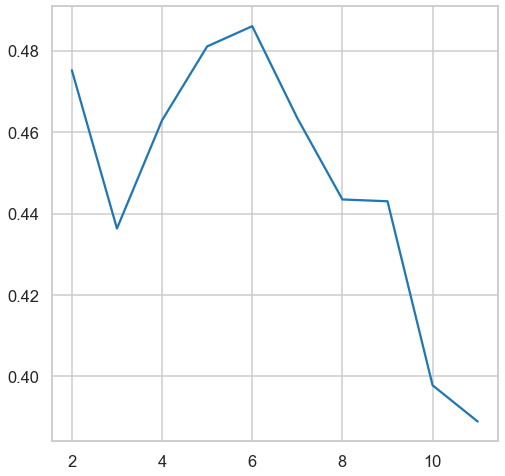

In [122]:
plt.plot(n,silScore_blob)

Best K according to sillouette scrores 

In [137]:
#optimum K at highest sillouette score
Kmeans_SilScore_Opt_blob=max(silScore_blob)
silScore_blob.index(max(silScore_blob))+2 #+2 is added because KMeansClustering function starts with K=2

6

DBSCAN

In [ ]:
epsilon,samples,silScores=DBSCAN_Clustering(Multi_blob_Data,0.1,2,0.1,5,7,1)

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(epsilon, samples, silScores, c=silScores);

# Iris Dataset

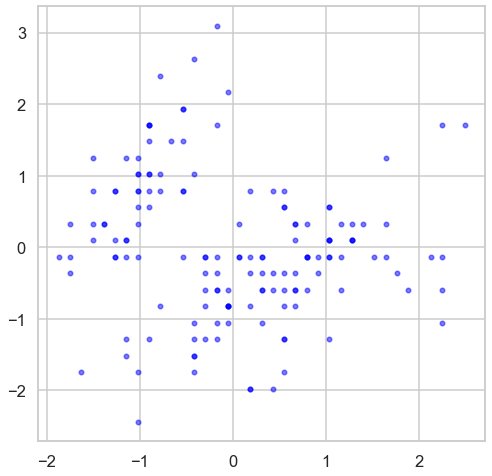

In [132]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data=iris_data.data
iris_data=StandardScaler().fit_transform(iris_data)#to scale data
display_cluster(iris_data)

K-Means

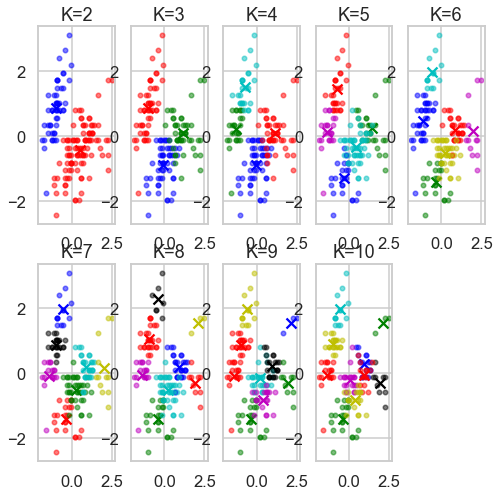

In [141]:
K=10
n = range(2,K+1)
dist_iris,silScore_iris,iris_clustersArray=KMeansClustering(iris_data,K)

Distortion vs K :

The figure below does not show a clear elbow and so cannot be sued to find the optimum K

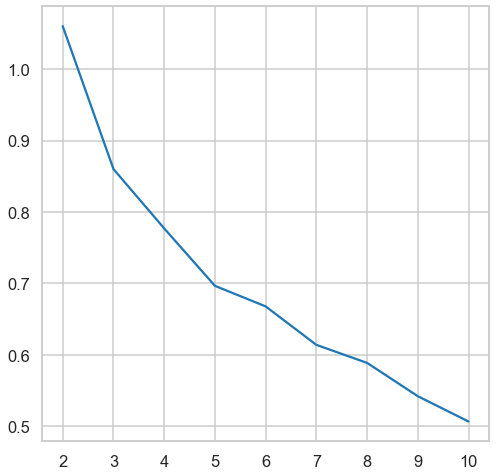

In [145]:
plt.plot(n,dist_iris)

Silhouette score vs K:

The figure below shows a clear distnction betweeen the sillouette score at K=2 and the rest, where at K=2 the highest score is observed.

Therefore the optimum K is equal to 2

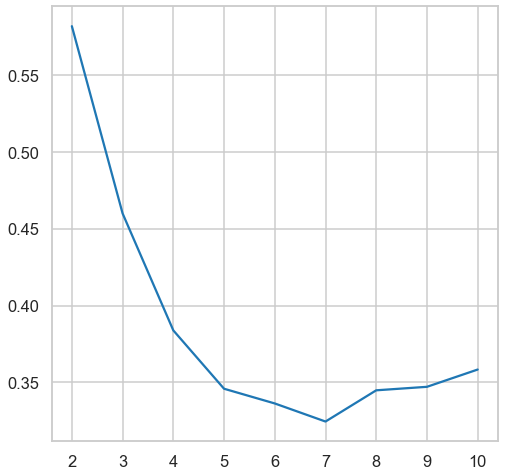

In [144]:
plt.plot(n,silScore_iris)

In [146]:
#optimum K at highest sillouette score
Kmeans_SilScore_Opt_iris=max(silScore_iris)
silScore_iris.index(max(silScore_iris))+2 

2

DBSCAN

In [ ]:
epsilon,samples,silScores=DBSCAN_Clustering(iris_data,0.1,3,0.1,5,25,1)

# Customer Dataset

In [294]:
df_customer = pd.read_csv("Customer data.csv",index_col=0)
df_customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


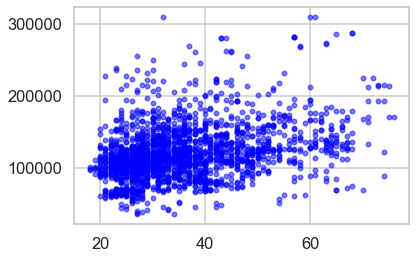

In [316]:
customer_data=df_customer[["Age", "Income"]]
customer_data=customer_data.to_numpy()
display_cluster(customer_data)